Suppose you run a casino and you suspect that a customer has replaced a die provided by the casino with a "crooked die"; that is, one that has been tampered with to make one of the faces more likely to come up than the others.  You apprehend the alleged cheater and confiscate the die, but now you have to prove that it is crooked.  You roll the die 60 times and get the following results: 

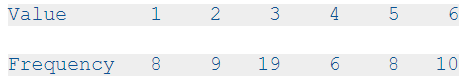

What is the probability of seeing results like this by chance?


Source:
http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html

by Allen Downey, author of Think Stats

https://greenteapress.com/wp/think-stats-2e/

https://github.com/AllenDowney/ThinkStats2

#### Generate data

In [79]:
observed = {1:8, 2:9, 3:19, 4:6, 5:8, 6:10} # observed frequency by value

In [80]:
observed

{1: 8, 2: 9, 3: 19, 4: 6, 5: 8, 6: 10}

In [81]:
# check the sum
sum(observed.values())

60

In [82]:
expected = {}
for i in range(1,7):
    expected[i] = 10

In [83]:
expected

{1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10}

#### Define test statistic

To compute a p-value, we have to choose a test statistic that measures how unexpected these results are.  The chi-squared statistic is a reasonable choice: for each value we compare the expected frequency, and the observed frequency, and compute the sum of the squared relative differences (why relative?  Because the variation in the observed values depends on the expected value).

In [84]:
def chi_squared(observed, expected):
    """
    return the squared difference between observed and expected frequency
    """
    total = 0
    for value, exp_freq in expected.items():
        obs_freq = observed[value]
        total += (obs_freq - exp_freq)**2
    return  total

#### Calculate the threshold

In [85]:
threshold = chi_squared(observed, expected)

In [86]:
threshold

106

#### Run simulation

In [87]:
import numpy as np

In [88]:
def simulate_rolls(n_rolls):
    """
    return dict freq by value
    """

    sample = np.random.choice(list(range(1,7)), size=60)
    unique, counts = np.unique(sample, return_counts=True)
    freq_by_value = dict(zip(unique, counts))
    for i in range(1,7): # to avoid missing keys
        if i not in freq_by_value:
            freq_by_value[i] = 0
    
    return freq_by_value


In [89]:
n_trials = 10000
n_rolls = 60

results = []
for t in range(n_trials):
    simulated = simulate_rolls(n_rolls)

    results.append(chi_squared(simulated, expected))

#### Plot results

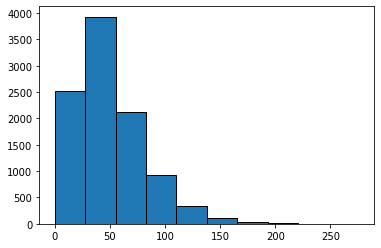

In [90]:
import matplotlib.pyplot as plt

plt.hist(results, edgecolor='black');

#### Calculate the p value

In [91]:
p_value = len([x for x in results if x > threshold])/n_trials

In [92]:
p_value

0.0585